### Business problem
Build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies. 

In [86]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read the data
movie_df = pd.read_csv("./data/movies.csv")
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [87]:
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [88]:
ratings_df = pd.read_csv("./data/ratings.csv", index_col=0)
ratings_df

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931
...,...,...,...
610,166534,4.0,1493848402
610,168248,5.0,1493850091
610,168250,5.0,1494273047


In [89]:
movie_df['year'] = movie_df.title.str.extract(r'(\(\d\d\d\d\))', expand=False)

movie_df['year'] = movie_df.year.str.extract(r'(\d\d\d\d)', expand=False)
# replace the parantheses with nothing
movie_df['title'] = movie_df['title'].str.replace(r'\(\d{4}\)', '', regex=True)

movie_df['title'] = movie_df['title'].apply(lambda x: x.strip())  # remove whitespace

movie_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [90]:
# make genres an array
movie_df['genres'] = movie_df['genres'].str.split('|')
movie_df.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [91]:
ratings_df.head()

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931


In [92]:
# remove the timestamp column from ratings_df
ratings_df = ratings_df.drop(columns=['timestamp'])


In [93]:
# merge the two dataframes
movie_ratings_df = pd.merge(movie_df, ratings_df, on='movieId', how='inner')
movie_ratings_df.head()

,movieId,title,genres,year,rating
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
1,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
2,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.5
3,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,2.5
4,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.5


In [94]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   year     100818 non-null  object 
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.8+ MB


In [95]:
movie_ratings_df.isnull().sum()

movieId     0
title       0
genres      0
year       18
rating      0
dtype: int64

In [112]:
# replace null values in the year column with zero
movie_ratings_df['year'] = movie_ratings_df['year'].replace(np.nan, 0)
movie_ratings_df['year'] = movie_ratings_df['year'].astype(int)

In [113]:
movie_ratings_df.isnull().sum(). sum()

0

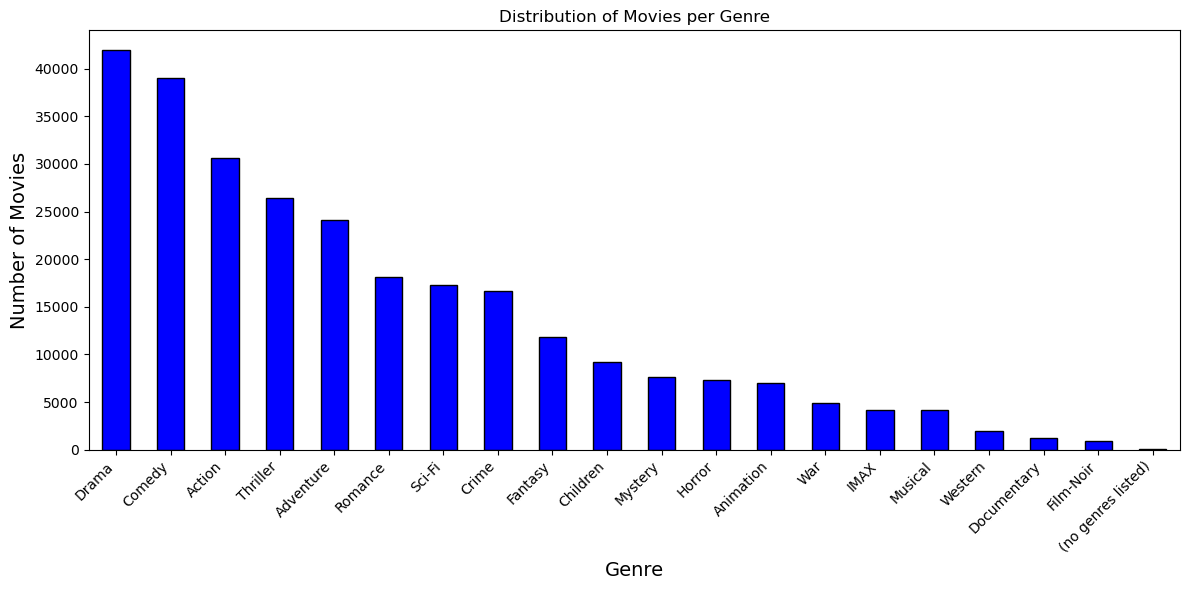

<Figure size 640x480 with 0 Axes>

In [98]:
# plot the distribution of movie per genre
genre_counts = movie_ratings_df['genres'].explode().value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Distribution of Movies per Genre')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('genre_distribution.png')

*Interpretation*
- Top five genres
- bottom three genre

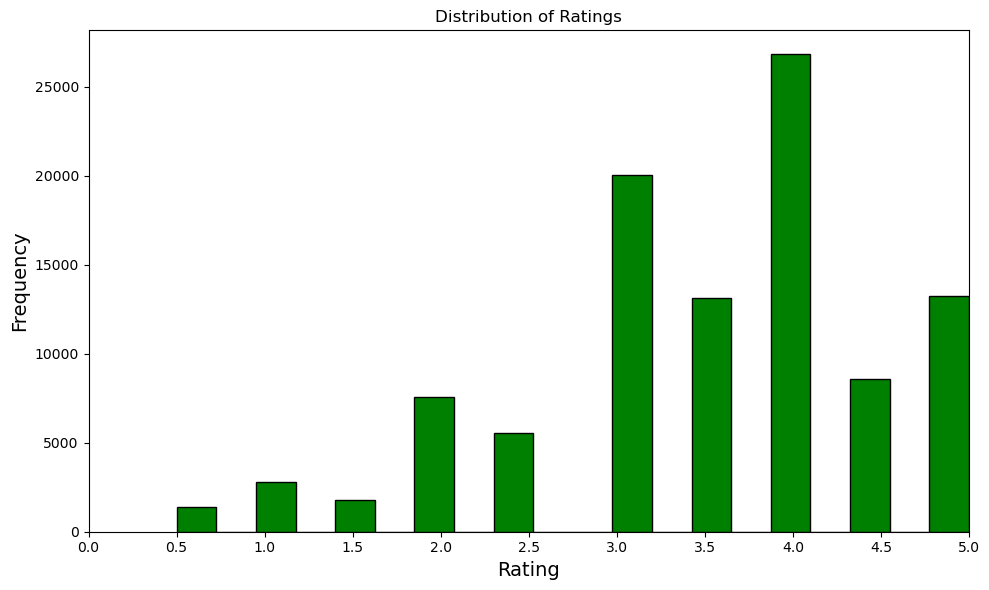

In [99]:
# plot the distribution of ratings
plt.figure(figsize=(10, 6))
movie_ratings_df['rating'].plot(kind='hist', bins=20, color='green', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(np.arange(0, 6, 0.5))
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

*Interprating*
- Most movies are rated 4

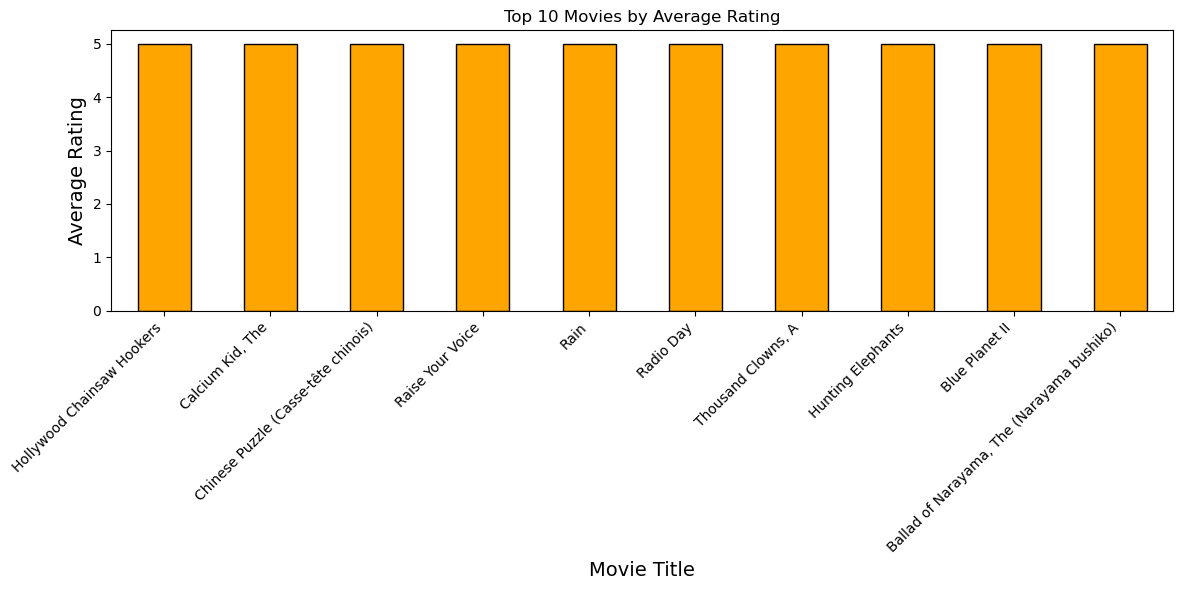

In [100]:
# Rating per movie
plt.figure(figsize=(12, 6))
movie_ratings_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Movie Title', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


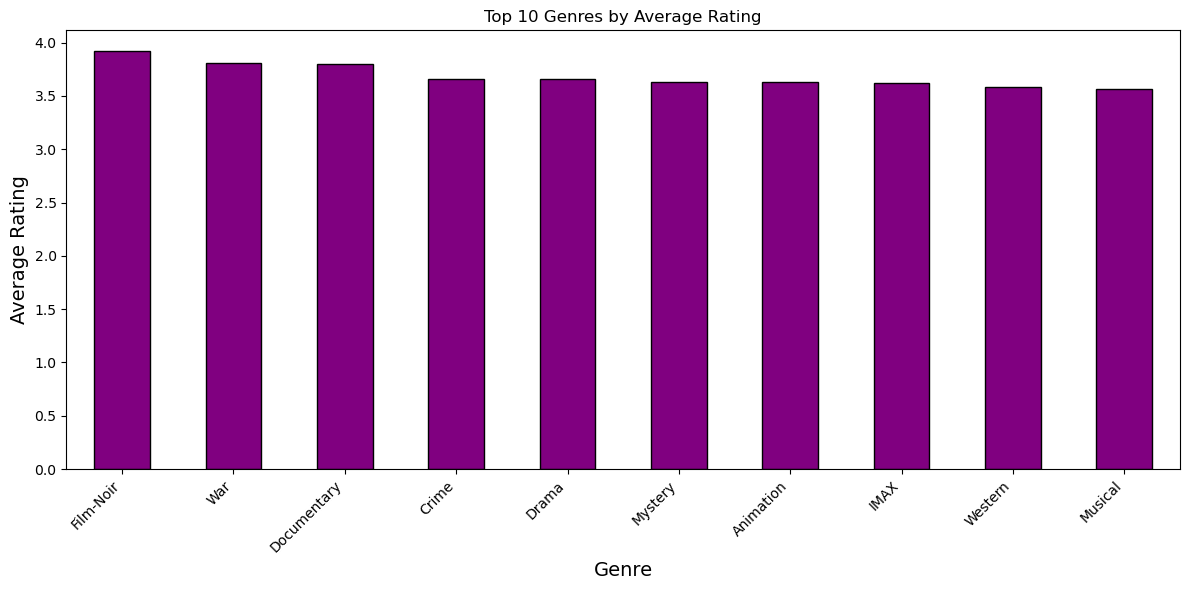

In [101]:
# plot the distribution of ratings per genre
plt.figure(figsize=(12, 6))
movie_ratings_df.explode('genres').groupby('genres')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [102]:
#  create a pivot table for ratings per genre in ascending order
pivot_table = movie_ratings_df.explode('genres').pivot_table(index='genres', values='rating', aggfunc='mean').sort_values(by='rating', ascending=False)
pivot_table


,rating
genres,
Film-Noir,3.920115
War,3.808294
Documentary,3.797785
Crime,3.658294
Drama,3.656184
Mystery,3.632460
Animation,3.629937
IMAX,3.618335
Western,3.583938


*Interpretation*
Film-Noir genre has the highest rating

In [110]:
movie_ratings_df['year'].value_counts()


year
1995    6144
1994    5296
1999    4536
1996    4509
2000    4268
        ... 
1903       2
1917       1
1915       1
1919       1
1908       1
Name: count, Length: 106, dtype: int64

In [115]:
# drop year upto 1995
movie_ratings_df = movie_ratings_df[movie_ratings_df['year'].astype(int) >= 1995]
movie_ratings_df.tail(10)

,movieId,title,genres,year,rating
100825,191005,Gintama,"[Action, Adventure, Comedy, Sci-Fi]",2017,4.5
100826,193565,Gintama: The Movie,"[Action, Animation, Comedy, Sci-Fi]",2010,3.5
100827,193567,anohana: The Flower We Saw That Day - The Movie,"[Animation, Drama]",2013,3.0
100828,193571,Silver Spoon,"[Comedy, Drama]",2014,4.0
100829,193573,Love Live! The School Idol Movie,[Animation],2015,4.0
100830,193579,Jon Stewart Has Left the Building,[Documentary],2015,3.5
100831,193581,Black Butler: Book of the Atlantic,"[Action, Animation, Comedy, Fantasy]",2017,4.0
100832,193583,No Game No Life: Zero,"[Animation, Comedy, Fantasy]",2017,3.5
100833,193585,Flint,[Drama],2017,3.5
100834,193587,Bungo Stray Dogs: Dead Apple,"[Action, Animation]",2018,3.5
